In [1]:
import pandas as pd
import re
pattern = re.compile('[^ㄱ-ㅎㅏ-ㅣ가-힣]')
data = open('unlabeled/unlabeled_comments_1.txt', 'r', encoding='utf-8')
df = pd.read_csv('hate_train.csv', encoding='ANSI')
df['comments'] = df['comments'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]','')

C:\Users\siryu\anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [2]:
df

,comments,hate
0,현재 호텔주인 심정 아 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속 추모받네,1
1,한국적인 미인의 대표적인 분너무나 곱고아름다운모습그모습뒤의 슬픔을 미처 알지못했네요ㅠ,0
2,못된 넘들남의 고통을 즐겼던 넘들이젠 마땅한 처벌을 받아야지그래야 공정한 사회지심은...,1
3,화 어설펐는데 화 지나서부터는 갈수록 너무 재밌던데,0
4,사람 얼굴 손톱으로 긁은것은 인격살해이고 동영상이 몰카냐 메걸리안들 생각이 없노,1
...,...,...
14187,좌우 헬파이어 개씩 개 장착에 아파치보다 약하지만 기관포 장착임,0
14188,세금 내놓으라고 데모질 중 ㅋㅋ간첩 도둑놈 새끼들이 대통령 해처먹으니까 나도 같이...,1
14189,너가 한 말 중에,0
14190,제갈대중 ㅇㅂ,0


(array([11060.,  3132.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

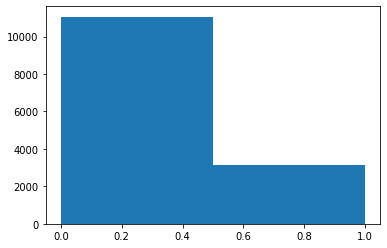

In [3]:
from matplotlib import pyplot as plt

plt.hist(df.hate, bins=2)

In [4]:
import sklearn
import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
data = df.comments
target = df.hate

In [6]:
stopwords=['에게', '를', '의', '로', '으로', '고', '하고', '듯', '인', '하는', '와', '과', '을', '들', '임', '게', '면', '가', '이가',
             '도', '마저', '한', '면', '네', '이', '는', '하', '다', '은', '지', '에', '거', '나', '보', '는데', '아', '나', '만', '에서',
             '음', '니', '냐', '만', ]

In [7]:
vectorizer = TfidfVectorizer(min_df=10, stop_words=stopwords)
X = vectorizer.fit_transform(data)

In [8]:
from sklearn.naive_bayes import MultinomialNB

In [9]:
clf = MultinomialNB()
clf.fit(X, target)

MultinomialNB()

In [10]:
pred = clf.predict(X)

In [11]:
print("Accuracy: ", sklearn.metrics.accuracy_score(target, pred))
print('Confusion Matrix: \n', sklearn.metrics.confusion_matrix(target, pred))

Accuracy:  0.8153889515219842
Confusion Matrix: 
 [[11008    52]
 [ 2568   564]]


In [68]:
text='ㅅㅂ 진짜 개빡치네'
sample = vectorizer.transform([text])[0]

In [69]:
import numpy as np
pred_label = np.argmax(clf.predict_proba(sample)[0])

In [71]:
clf.predict_proba(sample)

array([[0.11176009, 0.88823991]])

In [72]:
if pred_label == 1:
    print("%.2f%% 확률로 욕설 문장입니다." % (clf.predict_proba(sample)[0][1] * 100))
else:
    print('%.2f%% 확률로 일반 문장입니다.' % (clf.predict_proba(sample)[0][0] * 100))

88.82% 확률로 욕설 문장입니다.
